## 1.21*. Найти по 4 члена ряда Тэйлора в окрестности точки x = a и построить графики следующих функций и их рядов:

### 1.21.1*.

\begin{equation}
tg{x}, a = 1;
\end{equation}

Derivative  1 :  tan(x)
Derivative  2 :  tan(x)**2 + 1
Derivative  3 :  (2*tan(x)**2 + 2)*tan(x)
Derivative  4 :  (tan(x)**2 + 1)*(2*tan(x)**2 + 2) + 2*(2*tan(x)**2 + 2)*tan(x)**2
Derivative  5 :  2*(tan(x)**2 + 1)*(2*tan(x)**2 + 2)*tan(x) + 3*(2*tan(x)**2 + 2)**2*tan(x) + 4*(2*tan(x)**2 + 2)*tan(x)**3
Coefficient  1 :  1.55740772465490
Coefficient  2 :  3.42551882081476
Coefficient  3 :  5.33492947248766
Coefficient  4 :  9.45049997787964
Coefficient  5 :  16.4965914915633
Tayloer_term  1 :  1.55740772465490
Taylor_term  2 :  3.42551882081476*x - 3.42551882081476
Taylor_term  3 :  5.33492947248766*(x - 1.0)**2
Taylor_term  4 :  9.45049997787964*(x - 1.0)**3
Taylor_term  5 :  16.4965914915633*(x - 1.0)**4


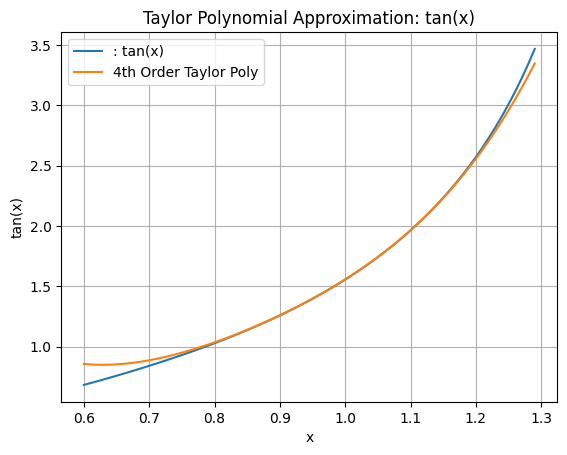

In [227]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt

x, a = sp.symbols('x a')

def compute_derivatives(func, input_number_of_terms):
    derivatives = [func]
    for i in range(1, input_number_of_terms + 1):
        derivative = derivatives[i-1].diff(x)
        derivatives.append(derivative)
    
    return derivatives

def compute_coefficients(_derivatives, _point):
    coeffs = []
    for i in range(0, len(_derivatives)):
        coef = _derivatives[i].subs({x: _point})/sp.factorial(i)
        coeffs.append(coef)
        
    return coeffs

def build_taylor_terms(func, input_number_of_terms, _point):
    derivatives = compute_derivatives(func, input_number_of_terms)
    coeffs = compute_coefficients(derivatives, _point)
    for i in range(0, len(derivatives)):
        print("Derivative ", i + 1, ": ", derivatives[i])
    for j in range(0, len(coeffs)):
        print("Coefficient ", j + 1, ": ", coeffs[j])
    
    taylor_terms = [coeffs[0]]
    print("Tayloer_term ", 1, ": ", taylor_terms[0])
    for k in range(1, len(coeffs)):
        term = coeffs[k] * pow(x - _point, k)
        print("Taylor_term ", k + 1, ": ", term)
        taylor_terms.append(term)
    
    return taylor_terms

def build_taylor_poly(taylor_terms):
    # initialize taylor polynomial
    _poly = None

    # loop through tayloer terms
    for term in range(len(taylor_terms)):
        # build up polynomial on each iteration
        _poly = taylor_terms[term] if _poly is None else _poly + taylor_terms[term]

    return _poly

def plot(_function, _poly, start, point, end):
    # plot actual function for comparison
    legend = []
    fig, ax = plt.subplots()
    label = function
    ax.set(xlabel='x', ylabel=f'{label}', title=f'Taylor Polynomial Approximation: {label}')
    time = np.arange(start, end, 0.01)
    ax.plot(time, [_function.subs({x: point}) for point in time])
    legend.append(f': {label}')
    
    #plot taylor polynomial
    ax.plot(time, [_poly.subs({x: point}) for point in time])
    legend.append(f'4th Order Taylor Poly')
    ax.legend(legend)
    
    ax.legend(legend)
    ax.grid()
    plt.show()

function = sp.tan(x)
start = 0.6
approximation_point = 1.0
end = 1.3
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

### 1.21.2*.

\begin{equation}
\arcsin(x-1), a = 1;
\end{equation}

Derivative  1 :  asin(x - 1)
Derivative  2 :  1/sqrt(1 - (x - 1)**2)
Derivative  3 :  (x - 1)/(1 - (x - 1)**2)**(3/2)
Derivative  4 :  (1 - (x - 1)**2)**(-3/2) + (x - 1)*(3*x - 3)/(1 - (x - 1)**2)**(5/2)
Derivative  5 :  3*(x - 1)/(1 - (x - 1)**2)**(5/2) + 2*(3*x - 3)/(1 - (x - 1)**2)**(5/2) + (x - 1)*(3*x - 3)*(5*x - 5)/(1 - (x - 1)**2)**(7/2)
Coefficient  1 :  0
Coefficient  2 :  1
Coefficient  3 :  0
Coefficient  4 :  1/6
Coefficient  5 :  0
Tayloer_term  1 :  0
Taylor_term  2 :  x - 1.0
Taylor_term  3 :  0
Taylor_term  4 :  (x - 1.0)**3/6
Taylor_term  5 :  0


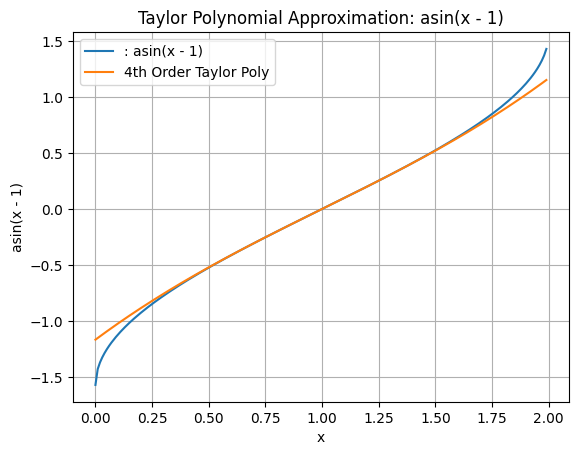

In [228]:
function = sp.asin(x-1)
start = 0.0
approximation_point = 1.0
end = 2.0
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

### 1.21.3*.

\begin{equation}
2\sqrt{x}, a = 0.5;
\end{equation}

Derivative  1 :  2*sqrt(x)
Derivative  2 :  1/sqrt(x)
Derivative  3 :  -1/(2*x**(3/2))
Derivative  4 :  3/(4*x**(5/2))
Derivative  5 :  -15/(8*x**(7/2))
Coefficient  1 :  1.41421356237310
Coefficient  2 :  1.41421356237310
Coefficient  3 :  -0.707106781186548
Coefficient  4 :  0.707106781186548
Coefficient  5 :  -0.883883476483184
Tayloer_term  1 :  1.41421356237310
Taylor_term  2 :  1.4142135623731*x - 0.707106781186548
Taylor_term  3 :  -0.707106781186548*(x - 0.5)**2
Taylor_term  4 :  0.707106781186548*(x - 0.5)**3
Taylor_term  5 :  -0.883883476483184*(x - 0.5)**4


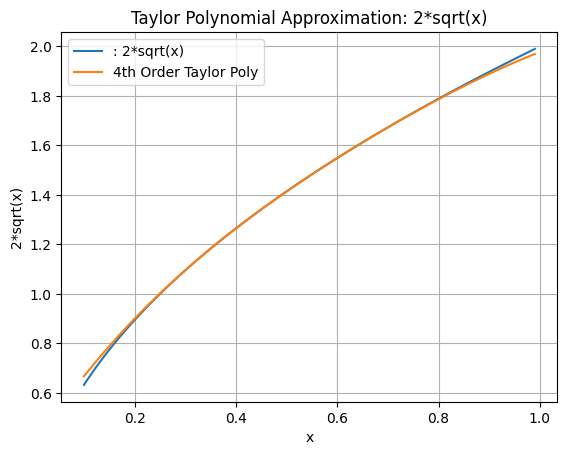

In [229]:
function = 2*sp.sqrt(x)
start = 0.1
approximation_point = 0.5
end = 1.0
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

### 1.21.4*.

\begin{equation}
e^{2\sin{x^2}}, a = 2.0;
\end{equation}

Derivative  1 :  exp(2*sin(x**2))
Derivative  2 :  4*x*exp(2*sin(x**2))*cos(x**2)
Derivative  3 :  -8*x**2*exp(2*sin(x**2))*sin(x**2) + 16*x**2*exp(2*sin(x**2))*cos(x**2)**2 + 4*exp(2*sin(x**2))*cos(x**2)
Derivative  4 :  -96*x**3*exp(2*sin(x**2))*sin(x**2)*cos(x**2) + 64*x**3*exp(2*sin(x**2))*cos(x**2)**3 - 16*x**3*exp(2*sin(x**2))*cos(x**2) - 24*x*exp(2*sin(x**2))*sin(x**2) + 48*x*exp(2*sin(x**2))*cos(x**2)**2
Derivative  5 :  192*x**4*exp(2*sin(x**2))*sin(x**2)**2 - 768*x**4*exp(2*sin(x**2))*sin(x**2)*cos(x**2)**2 + 32*x**4*exp(2*sin(x**2))*sin(x**2) + 256*x**4*exp(2*sin(x**2))*cos(x**2)**4 - 256*x**4*exp(2*sin(x**2))*cos(x**2)**2 - 576*x**2*exp(2*sin(x**2))*sin(x**2)*cos(x**2) + 384*x**2*exp(2*sin(x**2))*cos(x**2)**3 - 96*x**2*exp(2*sin(x**2))*cos(x**2) - 24*exp(2*sin(x**2))*sin(x**2) + 48*exp(2*sin(x**2))*cos(x**2)**2
Coefficient  1 :  0.220115033306814
Coefficient  2 :  -1.15101429901744
Coefficient  3 :  5.38699674493001
Coefficient  4 :  -13.2762568987285
Coefficient  5 :  28.1

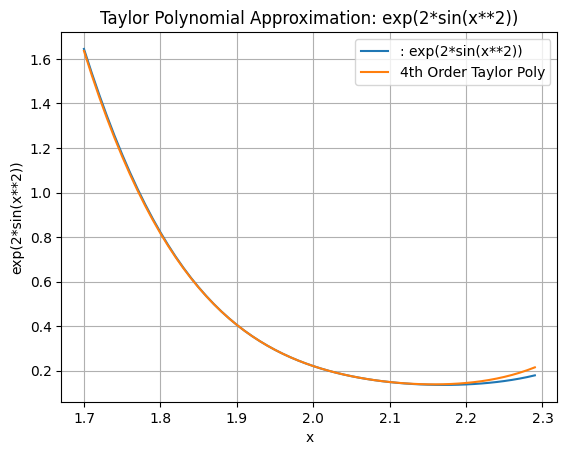

In [230]:
function = sp.exp(2*sp.sin(x*x))
start = 1.7
approximation_point = 2.0
end = 2.3
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

### 1.21.5*.

\begin{equation}
2ln{x^2}, a = 2.0;
\end{equation}

Derivative  1 :  2*log(x**2)
Derivative  2 :  4/x
Derivative  3 :  -4/x**2
Derivative  4 :  8/x**3
Derivative  5 :  -24/x**4
Coefficient  1 :  2.77258872223978
Coefficient  2 :  2.00000000000000
Coefficient  3 :  -0.500000000000000
Coefficient  4 :  0.166666666666667
Coefficient  5 :  -0.0625000000000000
Tayloer_term  1 :  2.77258872223978
Taylor_term  2 :  2.0*x - 4.0
Taylor_term  3 :  -2.0*(0.5*x - 1)**2
Taylor_term  4 :  1.33333333333333*(0.5*x - 1)**3
Taylor_term  5 :  -1.0*(0.5*x - 1)**4


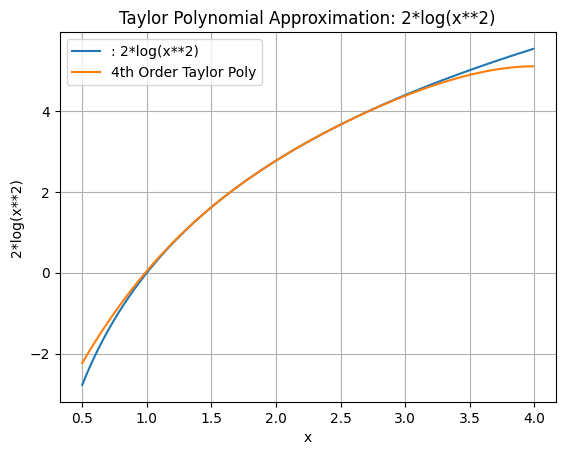

In [231]:
function = 2*sp.log(x*x)
start = 0.5
approximation_point = 2.0
end = 4.0
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

## 1.22*. Найти по 4 члена ряда Маклорена функций f(x) из примеров 1.21.1* - 1.21.6*. Записать приближенные значения выражения для f(x).

### 1.22.1*.

\begin{equation}
tg{x}, a = 1;
\end{equation}

Derivative  1 :  tan(x)
Derivative  2 :  tan(x)**2 + 1
Derivative  3 :  (2*tan(x)**2 + 2)*tan(x)
Derivative  4 :  (tan(x)**2 + 1)*(2*tan(x)**2 + 2) + 2*(2*tan(x)**2 + 2)*tan(x)**2
Derivative  5 :  2*(tan(x)**2 + 1)*(2*tan(x)**2 + 2)*tan(x) + 3*(2*tan(x)**2 + 2)**2*tan(x) + 4*(2*tan(x)**2 + 2)*tan(x)**3
Coefficient  1 :  0
Coefficient  2 :  1
Coefficient  3 :  0
Coefficient  4 :  1/3
Coefficient  5 :  0
Tayloer_term  1 :  0
Taylor_term  2 :  x
Taylor_term  3 :  0
Taylor_term  4 :  x**3/3
Taylor_term  5 :  0


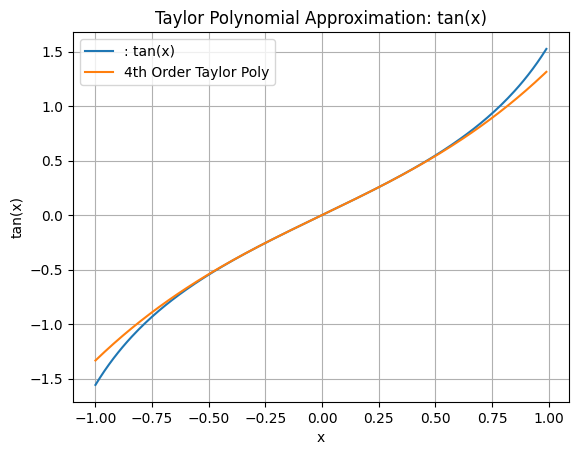

In [232]:
function = sp.tan(x)
start = -1.0
approximation_point = 0.0
end = 1.0
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

### 1.22.2*.

\begin{equation}
\arcsin(x-1), a = 1;
\end{equation}

In [233]:
function = sp.asin(x-1)
start = -1.0
approximation_point = 0.0
end = 1.0
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
#plot(function, taylor_poly, start, approximation_point, end)

Derivative  1 :  asin(x - 1)
Derivative  2 :  1/sqrt(1 - (x - 1)**2)
Derivative  3 :  (x - 1)/(1 - (x - 1)**2)**(3/2)
Derivative  4 :  (1 - (x - 1)**2)**(-3/2) + (x - 1)*(3*x - 3)/(1 - (x - 1)**2)**(5/2)
Derivative  5 :  3*(x - 1)/(1 - (x - 1)**2)**(5/2) + 2*(3*x - 3)/(1 - (x - 1)**2)**(5/2) + (x - 1)*(3*x - 3)*(5*x - 5)/(1 - (x - 1)**2)**(7/2)
Coefficient  1 :  -1.57079632679490
Coefficient  2 :  zoo
Coefficient  3 :  zoo
Coefficient  4 :  nan
Coefficient  5 :  nan
Tayloer_term  1 :  -1.57079632679490
Taylor_term  2 :  zoo*x
Taylor_term  3 :  zoo*x**2
Taylor_term  4 :  nan
Taylor_term  5 :  nan


### 1.22.4*.

\begin{equation}
e^{2\sin{x^2}}, a = 2.0;
\end{equation}

Derivative  1 :  exp(2*sin(x**2))
Derivative  2 :  4*x*exp(2*sin(x**2))*cos(x**2)
Derivative  3 :  -8*x**2*exp(2*sin(x**2))*sin(x**2) + 16*x**2*exp(2*sin(x**2))*cos(x**2)**2 + 4*exp(2*sin(x**2))*cos(x**2)
Derivative  4 :  -96*x**3*exp(2*sin(x**2))*sin(x**2)*cos(x**2) + 64*x**3*exp(2*sin(x**2))*cos(x**2)**3 - 16*x**3*exp(2*sin(x**2))*cos(x**2) - 24*x*exp(2*sin(x**2))*sin(x**2) + 48*x*exp(2*sin(x**2))*cos(x**2)**2
Derivative  5 :  192*x**4*exp(2*sin(x**2))*sin(x**2)**2 - 768*x**4*exp(2*sin(x**2))*sin(x**2)*cos(x**2)**2 + 32*x**4*exp(2*sin(x**2))*sin(x**2) + 256*x**4*exp(2*sin(x**2))*cos(x**2)**4 - 256*x**4*exp(2*sin(x**2))*cos(x**2)**2 - 576*x**2*exp(2*sin(x**2))*sin(x**2)*cos(x**2) + 384*x**2*exp(2*sin(x**2))*cos(x**2)**3 - 96*x**2*exp(2*sin(x**2))*cos(x**2) - 24*exp(2*sin(x**2))*sin(x**2) + 48*exp(2*sin(x**2))*cos(x**2)**2
Coefficient  1 :  1
Coefficient  2 :  0
Coefficient  3 :  2
Coefficient  4 :  0
Coefficient  5 :  2
Tayloer_term  1 :  1
Taylor_term  2 :  0
Taylor_term  3 :  2*x**2

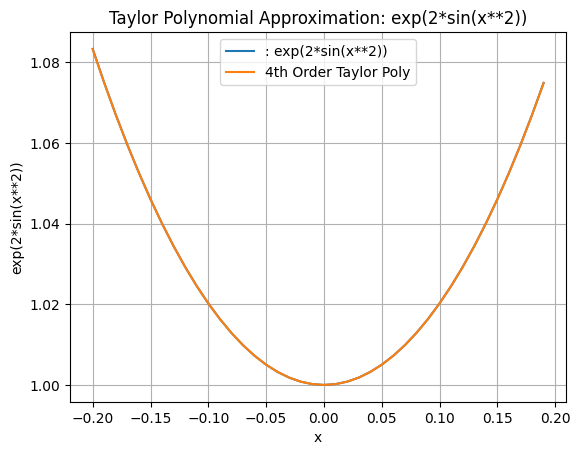

In [234]:
function = sp.exp(2*sp.sin(x*x))
start = -0.2
approximation_point = 0.0
end = 0.2
order = 4

taylor_series = build_taylor_terms(function, order, approximation_point)
taylor_poly = build_taylor_poly(taylor_series)
plot(function, taylor_poly, start, approximation_point, end)

## 1.25*. Найти первые пять членов ряда Фурье, записать конечный ряд Фурье  периодических функций, графики которых приведены на рис. 1.6 (Гайдук). Построить совместные графики функций и их рядов.

В ряд Фурье разлагаются периодические интегрируемые функции. Для некоторой функции $f(t)$ с периодом $T$ ряд Фурье имеет вид

\begin{equation}
f(t) = a_0 + \sum_{k=1}^{\infty} (a_k cos{k\Delta\omega t} + b_k sin{k\Delta\omega t}). \tag{1.16}
\end{equation}

Здесь $a_0$ - среднее значение - постоянная составляющая функции $f(t)$; cумма $a_k cos{k\Delta\omega t} + b_k sin{k\Delta\omega t}$ называется $k$-ой гармоникой; $\Delta\omega = 2\pi/T$ - частота первой гармоники; числа $a_k$, $b_k$ при $k\geq0$ называются коэффициентами ряда Фурье (1.16) и вычисляются по формулам:

\begin{equation}
a_0 = \frac{1}{T}\int_{-T/2}^{T/2}f(t)dt, \tag{1.17}
\end{equation}

\begin{equation}
a_k = \frac{2}{T}\int_{-T/2}^{T/2}f(t)cos{(k\Delta\omega t)}dt, \tag{1.18}
\end{equation}

\begin{equation}
b_k = \frac{2}{T}\int_{-T/2}^{T/2}f(t)sin{(k\Delta\omega t)}dt. \tag{1.19}
\end{equation}

Из выражения (1.16) следует, что если $f(t)$ - нечетная функция (симметричная относительно начала координат, т.е. $f(-t) = -f(t))$ на интервале $[-0.5T, 0.5T]$, то 

\begin{equation}
a_0 = 0,
a_k = 0,\tag{1.20}
b_k = \frac{4}{T}\int_{0}^{T/2}f(t)sin{(k\Delta\omega t)}dt, k = [1, \infty).
\end{equation}

Если же функция $f(t)$ - четная (симметричная относительно оси ординат, т.е. $f(t) = f(-t)$ на интервале $[-0.5T, 0.5T]$), то 

\begin{equation}
a_0 = \frac{2}{T}\int_{0}^{T/2}f(t)dt,
a_k = \frac{4}{T}\int_{0}^{T/2}f(t)cos{(k\Delta\omega t)}dt,\tag{1.21}
b_k = 0, k = [1, \infty).
\end{equation}

### 1.25.1*

В рассматриваемом случае, функция $f(t)$ является четной, причем $T = 4$, а $\Delta\omega = \pi/2$. На интервале $[0, T/2]$ функция имеет вид $f(t) = t/2$, поэтому по формулам (1.21) имеем

\begin{equation}
b_k = 0, a_0 = \frac{2}{T}\int_{0}^{T/2}\frac{t}{2}dt = \frac{1}{T}\int_{0}^{T/2}tdt = \left.\frac{1}{T}\frac{t^2}{2}\right|_0^{T/2} = \frac{1}{2T}\frac{t^2}{4} = \frac{t^2}{8T} = \frac{16}{32} = 0.5
\end{equation}

\begin{equation}
a_k = \frac{4}{T}\int_{0}^{T/2}\frac{t}{2}cos{(k\Delta\omega t)}dt = \frac{2}{T}\int_{0}^{T/2}t*cos{(k\Delta\omega t)}dt = \frac{2}{T}\int_{0}^{T/2}t*cos{(k\frac{\pi}{2} t)}dt = \frac{1}{2}\int_{0}^{T/2}t*cos{(k\frac{\pi}{2} t)}dt
\end{equation}

In [235]:
t, k = sp.symbols('t k')
a_k = sp.integrate(t*sp.cos(k*t*sp.pi/2)/2, (t, 0, 2))
a_k

Piecewise((2*sin(pi*k)/(pi*k) + 2*cos(pi*k)/(pi**2*k**2) - 2/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (1, True))

In [236]:
a_1 = a_k.subs({k: 1})
a_1

-4/pi**2

In [237]:
a_2 = a_k.subs({k: 2})
a_2

0

In [238]:
a_3 = a_k.subs({k: 3})
a_3

-4/(9*pi**2)

In [239]:
a_4 = a_k.subs({k: 4})
a_4

0

In [240]:
a_5 = a_k.subs({k: 5})
a_5

-4/(25*pi**2)

In [241]:
a_6 = a_k.subs({k: 6})
a_6

0

In [242]:
a_7 = a_k.subs({k: 7})
a_7

-4/(49*pi**2)

Следовательно, заданная функция $f(t)$ приближенно описывается выражением

\begin{equation}
f(t) = 0.5 - \frac{4}{\pi^2}*cos(\frac{\pi}{2}t) - \frac{4}{9\pi^2}*cos(\frac{3\pi}{2}t) - \frac{4}{25\pi^2}*cos(\frac{5\pi}{2}t) - \frac{4}{49\pi^2}*cos(\frac{7\pi}{2}t)
\end{equation}

### 1.25.2*

В рассматриваемом случае, функция $f(t)$ является нечетной, причем $T = 4$, а $\Delta\omega = \pi/2$. На интервале $[0, 1]$ функция имеет вид $f(t) = 2t$, а на интервале $[1, 2] - f(t) = -2t + 4$, поэтому по формулам (1.20) имеем

\begin{equation}
a_0 = 0,
a_k = 0,\\
b_k = \frac{4}{T}\int_{0}^{1}2t*sin{(k\frac{\pi}{2} t)}dt + \frac{4}{T}\int_{1}^{2}(-2t+4)*sin{(k\frac{\pi}{2} t)}dt= \frac{8}{4}\int_{0}^{1}t*sin{(k\frac{\pi}{2} t)}dt + \int_{1}^{2}(-2t+4)*sin{(k\frac{\pi}{2} t)}dt = 2\int_{0}^{1}t*sin{(k\frac{\pi}{2} t)}dt + \int_{1}^{2}(-2t+4)*sin{(k\frac{\pi}{2} t)}dt
\end{equation}

In [243]:
t, k = sp.symbols('t k')
b_k_left = 2*sp.integrate(t*sp.sin(k*t*sp.pi/2), (t, 0, 1))
b_k_left

2*Piecewise((-2*cos(pi*k/2)/(pi*k) + 4*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [244]:
t, k = sp.symbols('t k')
b_k_right = sp.integrate((-2*t+4)*sp.sin(k*t*sp.pi/2), (t, 1, 2))
b_k_right

Piecewise((4*cos(pi*k/2)/(pi*k) + 8*sin(pi*k/2)/(pi**2*k**2) - 8*sin(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [245]:
b_k = b_k_left + b_k_right
b_k

2*Piecewise((-2*cos(pi*k/2)/(pi*k) + 4*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True)) + Piecewise((4*cos(pi*k/2)/(pi*k) + 8*sin(pi*k/2)/(pi**2*k**2) - 8*sin(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [246]:
b_0 = b_k.subs({k: 0})
b_0

0

In [247]:
b_1 = b_k.subs({k: 1})
b_1

16/pi**2

In [248]:
b_2 = b_k.subs({k: 2})
b_2

0

In [249]:
b_3 = b_k.subs({k: 3})
b_3

-16/(9*pi**2)

In [250]:
b_4 = b_k.subs({k: 4})
b_4

0

In [251]:
b_5 = b_k.subs({k: 5})
b_5

16/(25*pi**2)

In [252]:
b_6 = b_k.subs({k: 6})
b_6

0

In [253]:
b_7 = b_k.subs({k: 7})
b_7

-16/(49*pi**2)

In [254]:
b_8 = b_k.subs({k: 8})
b_8

0

In [255]:
b_9 = b_k.subs({k: 9})
b_9

16/(81*pi**2)

Следовательно, заданная функция $f(t)$ приближенно описывается выражением

\begin{equation}
f(t) = \frac{16}{\pi^2}*sin(\frac{\pi}{2}t) - \frac{16}{9\pi^2}*sin(\frac{3\pi}{2}t) + \frac{16}{25\pi^2}*sin(\frac{5\pi}{2}t) - \frac{16}{49\pi^2}*sin(\frac{7\pi}{2}t) + \frac{16}{81\pi^2}*sin(\frac{9\pi}{2}t)
\end{equation}

### 1.25.3*

В рассматриваемом случае, функция $f(t)$ является нечетной, причем $T = 8$, а $\Delta\omega = \pi/4$. На интервале $[0, 2]$ функция имеет вид $f(t) = 0$, а на интервале $[2, 4] - f(t) = 4$, поэтому по формулам (1.20) имеем

\begin{equation}
a_0 = 0,
a_k = 0,\\
b_k = \frac{4}{T}\int_{2}^{4}(-1)sin{(k\frac{\pi}{4} t)}dt= -\frac{4}{8}\int_{2}^{4}sin{(k\frac{\pi}{4} t)}dt = -\frac{1}{2}\int_{2}^{4}sin{(k\frac{\pi}{4} t)}dt
\end{equation}

In [256]:
t, k = sp.symbols('t k')
b_k = -sp.integrate(sp.sin(k*t*sp.pi/4)/2, (t, 2, 4))
b_k

-Piecewise((2*cos(pi*k/2)/(pi*k) - 2*cos(pi*k)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [257]:
b_0 = b_k.subs({k: 0})
b_0

0

In [258]:
b_1 = b_k.subs({k: 1})
b_1

-2/pi

In [259]:
b_2 = b_k.subs({k: 2})
b_2

2/pi

In [260]:
b_3 = b_k.subs({k: 3})
b_3

-2/(3*pi)

In [261]:
b_4 = b_k.subs({k: 4})
b_4

0

In [262]:
b_5 = b_k.subs({k: 5})
b_5

-2/(5*pi)

In [263]:
b_6 = b_k.subs({k: 6})
b_6

2/(3*pi)

In [264]:
b_7 = b_k.subs({k: 7})
b_7

-2/(7*pi)

Следовательно, заданная функция $f(t)$ приближенно описывается выражением

\begin{equation}
f(t) = -\frac{2}{\pi}*sin(\frac{\pi}{4}t) + \frac{2}{\pi}*sin(\frac{2\pi}{4}t) - \frac{2}{3\pi}*sin(\frac{3\pi}{4}t) - \frac{2}{5\pi}*sin(\frac{5\pi}{4}t) + \frac{2}{3\pi}*sin(\frac{6\pi}{4}t) - \frac{2}{7\pi}*sin(\frac{7\pi}{4}t)
\end{equation}

### 1.25.4*

Заданная функция имеет $T = 4, \Delta\omega = \pi/2$ и не является ни четной, ни нечетной, поэтому используем формулы (1.17) - (1.19). На интервале
* $[-1, 0]$ функция имеет вид $f(t) = 5t$,
* $[0, 1] - f(t) = 3t$,
* $[1, 2] - f(t) = -3t+6$
* $[2, 3] - f(t) = -5t + 10$


\begin{equation}
a_0 = \frac{1}{4}\int_{-1}^{3}f(t)dt= \frac{1}{4}\left(\int_{-1}^{0}5tdt + \int_{0}^{1}3tdt + \int_{1}^{2}(-3t+6)dt + \int_{2}^{3}(-5t+10)dt\right)
\end{equation}

Первый интеграл:
\begin{equation}
\int_{-1}^{0}5tdt = 5\int_{-1}^{0}tdt = \left.\frac{5t^2}{2}\right|_{-1}^{0} = -\frac{5}{2}
\end{equation}    

Второй интеграл:
\begin{equation}
\int_{0}^{1}3tdt = 3\int_{0}^{1}tdt = \left.\frac{3t^2}{2}\right|_{0}^{1} = \frac{3}{2}
\end{equation}    

Третий интеграл:
\begin{equation}
\int_{1}^{2}(-3t+6)dt = \left.\left(-\frac{3t^2}{2} + 6t\right)\right|_{1}^{2} = \frac{3}{2}
\end{equation}    

Четвертый интеграл:
\begin{equation}
\int_{2}^{3}(-5t+10)dt = \left.\left(-\frac{5t^2}{2} + 10t\right)\right|_{2}^{3} = -\frac{5}{2}
\end{equation} 

$a_0 = \frac{1}{4}\left(-\frac{5}{2} + \frac{3}{2} + \frac{3}{2} - \frac{5}{2}\right) = -\frac{1}{2}$

\begin{equation}
a_k = \frac{2}{T}\int_{-T/2}^{T/2}f(t)cos{(k\Delta\omega t)}dt = \frac{1}{2}\int_{-1}^{3}f(t)cos{(k\frac{\pi}{2} t)}dt = \frac{1}{2}\left(\int_{-1}^{0}5t*cos{(k\frac{\pi}{2} t)}dt + \int_{0}^{1}3t*cos{(k\frac{\pi}{2} t)}dt + \int_{1}^{2}(-3t+6)*cos{(k\frac{\pi}{2} t)}dt + \int_{2}^{3}(-5t+10)*cos{(k\frac{\pi}{2} t)}dt\right)
\end{equation}

In [265]:
t, k = sp.symbols('t k')
a_1st_int = sp.integrate(5*t*sp.cos(k*t*sp.pi/2)/2, (t, -1, 0))
a_1st_int

Piecewise((-5*sin(pi*k/2)/(pi*k) - 10*cos(pi*k/2)/(pi**2*k**2) + 10/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (-5/4, True))

In [266]:
t, k = sp.symbols('t k')
a_2nd_int = sp.integrate(3*t*sp.cos(k*t*sp.pi/2)/2, (t, 0, 1))
a_2nd_int

Piecewise((3*sin(pi*k/2)/(pi*k) + 6*cos(pi*k/2)/(pi**2*k**2) - 6/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (3/4, True))

In [267]:
t, k = sp.symbols('t k')
a_3rd_int = sp.integrate((-3*t + 6)*sp.cos(k*t*sp.pi/2)/2, (t, 1, 2))
a_3rd_int

Piecewise((-3*sin(pi*k/2)/(pi*k) + 6*cos(pi*k/2)/(pi**2*k**2) - 6*cos(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (3/4, True))

In [268]:
t, k = sp.symbols('t k')
a_4th_int = sp.integrate((-5*t + 10)*sp.cos(k*t*sp.pi/2)/2, (t, 2, 3))
a_4th_int

Piecewise((-5*sin(3*pi*k/2)/(pi*k) + 10*cos(pi*k)/(pi**2*k**2) - 10*cos(3*pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (-5/4, True))

In [269]:
a_k = a_1st_int + a_2nd_int + a_3rd_int + a_4th_int
a_k

Piecewise((-5*sin(pi*k/2)/(pi*k) - 10*cos(pi*k/2)/(pi**2*k**2) + 10/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (-5/4, True)) + Piecewise((-3*sin(pi*k/2)/(pi*k) + 6*cos(pi*k/2)/(pi**2*k**2) - 6*cos(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (3/4, True)) + Piecewise((3*sin(pi*k/2)/(pi*k) + 6*cos(pi*k/2)/(pi**2*k**2) - 6/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (3/4, True)) + Piecewise((-5*sin(3*pi*k/2)/(pi*k) + 10*cos(pi*k)/(pi**2*k**2) - 10*cos(3*pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (-5/4, True))

In [270]:
a_1 = a_k.subs({k: 1})
a_1

0

In [271]:
a_2 = a_k.subs({k: 2})
a_2

4/pi**2

In [272]:
a_3 = a_k.subs({k: 3})
a_3

0

In [273]:
a_4 = a_k.subs({k: 4})
a_4

0

In [274]:
a_5 = a_k.subs({k: 5})
a_5

0

In [275]:
a_6 = a_k.subs({k: 6})
a_6

4/(9*pi**2)

\begin{equation}
b_k = \frac{2}{T}\int_{-T/2}^{T/2}f(t)sin{(k\Delta\omega t)}dt = \frac{1}{2}\int_{-1}^{3}f(t)sin{(k\frac{\pi}{2} t)}dt = \frac{1}{2}\left(\int_{-1}^{0}5t*sin{(k\frac{\pi}{2} t)}dt + \int_{0}^{1}3t*sin{(k\frac{\pi}{2} t)}dt + \int_{1}^{2}(-3t+6)*sin{(k\frac{\pi}{2} t)}dt + \int_{2}^{3}(-5t+10)*sin{(k\frac{\pi}{2} t)}dt\right)
\end{equation}

In [276]:
t, k = sp.symbols('t k')
b_1st_int = sp.integrate(5*t*sp.sin(k*t*sp.pi/2)/2, (t, -1, 0))
b_1st_int

Piecewise((-5*cos(pi*k/2)/(pi*k) + 10*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [277]:
t, k = sp.symbols('t k')
b_2nd_int = sp.integrate(3*t*sp.sin(k*t*sp.pi/2)/2, (t, 0, 1))
b_2nd_int

Piecewise((-3*cos(pi*k/2)/(pi*k) + 6*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [278]:
t, k = sp.symbols('t k')
b_3rd_int = sp.integrate((-3*t + 6)*sp.sin(k*t*sp.pi/2)/2, (t, 1, 2))
b_3rd_int

Piecewise((3*cos(pi*k/2)/(pi*k) + 6*sin(pi*k/2)/(pi**2*k**2) - 6*sin(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [279]:
t, k = sp.symbols('t k')
b_4th_int = sp.integrate((-5*t + 10)*sp.sin(k*t*sp.pi/2)/2, (t, 2, 3))
b_4th_int

Piecewise((5*cos(3*pi*k/2)/(pi*k) + 10*sin(pi*k)/(pi**2*k**2) - 10*sin(3*pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [280]:
b_k = b_1st_int + b_2nd_int + b_3rd_int + b_4th_int
b_k

Piecewise((-5*cos(pi*k/2)/(pi*k) + 10*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True)) + Piecewise((-3*cos(pi*k/2)/(pi*k) + 6*sin(pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True)) + Piecewise((3*cos(pi*k/2)/(pi*k) + 6*sin(pi*k/2)/(pi**2*k**2) - 6*sin(pi*k)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True)) + Piecewise((5*cos(3*pi*k/2)/(pi*k) + 10*sin(pi*k)/(pi**2*k**2) - 10*sin(3*pi*k/2)/(pi**2*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (0, True))

In [281]:
b_1 = b_k.subs({k: 1})
b_1

32/pi**2

In [282]:
b_2 = b_k.subs({k: 2})
b_2

0

In [283]:
b_3 = b_k.subs({k: 3})
b_3

-32/(9*pi**2)

In [284]:
b_4 = b_k.subs({k: 4})
b_4

0

In [285]:
b_5 = b_k.subs({k: 5})
b_5

32/(25*pi**2)

In [286]:
b_6 = b_k.subs({k: 6})
b_6

0